In [1]:
import scipy.io as sio
import numpy as np
mt = sio.loadmat('/home/maria/Documents/EnsemblePursuit/BehaviorData/spont_M161025_MP030_20161120.mat')
spks = mt['Fsp']                   # neurons by timepoints
med = mt['med']                 # cell centers (X Y Z)

### behavioral measures
runSpeed = mt['beh']['runSpeed']    # running speed
# get motion SVDs (time x components)
motionSVD=np.array(mt['beh'][0]['face'][0]['motionSVD'][0][0])

In [6]:
print(spks.shape)

(10164, 15761)


In [2]:
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuitNumpy import EnsemblePursuitNumpy
import numpy as np
import time
options_dict={'seed_neuron_av_nr':100,'min_assembly_size':8}
#ep_pt=EnsemblePursuitNumpy(n_ensembles=300,lambd=0.005,options_dict=options_dict)
ep_np=EnsemblePursuitNumpy(n_ensembles=150,lambd=0.01,options_dict=options_dict)
U,V=ep_np.fit_transform(spks)

nr of neurons in ensemble 4195
ensemble nr 0
cost 0.908145779875082
nr of neurons in ensemble 795
ensemble nr 1
cost 0.9050981617805106
nr of neurons in ensemble 507
ensemble nr 2
cost 0.9028068158151785
nr of neurons in ensemble 1130
ensemble nr 3
cost 0.9005386043906279
nr of neurons in ensemble 1355
ensemble nr 4
cost 0.8980589686857207
nr of neurons in ensemble 162
ensemble nr 5
cost 0.8972982515702108
nr of neurons in ensemble 441
ensemble nr 6
cost 0.8960643447477853
nr of neurons in ensemble 493
ensemble nr 7
cost 0.8948896691167258
nr of neurons in ensemble 150
ensemble nr 8
cost 0.8943322057901573
nr of neurons in ensemble 355
ensemble nr 9
cost 0.8931326480599907
nr of neurons in ensemble 214
ensemble nr 10
cost 0.892414325559711
nr of neurons in ensemble 205
ensemble nr 11
cost 0.8917459302219796
nr of neurons in ensemble 152
ensemble nr 12
cost 0.891137560358184
nr of neurons in ensemble 266
ensemble nr 13
cost 0.8902901587041273
nr of neurons in ensemble 399
ensemble nr 14

nr of neurons in ensemble 21
ensemble nr 120
cost 0.8577810874209482
nr of neurons in ensemble 42
ensemble nr 121
cost 0.8575523446403879
nr of neurons in ensemble 22
ensemble nr 122
cost 0.8573697197374871
nr of neurons in ensemble 20
ensemble nr 123
cost 0.8571857931278469
nr of neurons in ensemble 24
ensemble nr 124
cost 0.8570056280026075
nr of neurons in ensemble 24
ensemble nr 125
cost 0.85681748006687
nr of neurons in ensemble 38
ensemble nr 126
cost 0.8565898857745804
nr of neurons in ensemble 37
ensemble nr 127
cost 0.8563716430438637
nr of neurons in ensemble 19
ensemble nr 128
cost 0.8561941717332
nr of neurons in ensemble 18
ensemble nr 129
cost 0.8560158692349097
nr of neurons in ensemble 15
ensemble nr 130
cost 0.8558296233763789
nr of neurons in ensemble 12
ensemble nr 131
cost 0.8556787992163847
nr of neurons in ensemble 19
ensemble nr 132
cost 0.8555029269463602
nr of neurons in ensemble 12
ensemble nr 133
cost 0.855348874156113
nr of neurons in ensemble 12
ensemble nr

In [4]:
bundle={'U':U,'V':V}
#np.save('beh_ep.npy',bundle)


In [13]:
U=np.load('beh_ep.npy',allow_pickle=True)[()]['U']
print(U)
V=np.load('beh_ep.npy',allow_pickle=True)[()]['V']

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.71918865 0.         ... 0.         0.         0.        ]
 [1.48441601 0.68035646 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [11]:
from Pipelines.SingleMousePipeline import ModelPipelineSingleMouse
pipeline=ModelPipelineSingleMouse('/home/maria/Documents/EnsemblePursuit/BehaviorData/','spont_M161025_MP030_20161120.mat','EnsemblePursuit_numpy',150)
pipeline.variance_explained_across_neurons(U,V)

KeyError: 'stim'

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


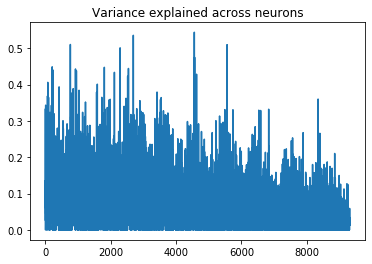

Total variance explained, averaged over neurons is: 0.0696826508374353


In [14]:
from utils import zscore
import matplotlib.pyplot as plt
def variance_explained_across_neurons(spks,U,V):
    '''
    The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares
    ((y_true - y_pred) ** 2).sum() and v is the total sum of squares
    ((y_true - y_true.mean()) ** 2).sum().
    '''
    #Fetch the original data and convert it into the same form as what goes into the
    #matrix factorization model
    X=zscore(spks.T).T
    u=[]
    v=[]
    approx=U@V.T
    for j in range(X.shape[0]):
        u_j=((X[j,:]-approx[j,:])**2).sum()
        v_j=((X[j,:]-np.mean(X[j,:]))**2).sum()
        u.append(u_j)
        v.append(v_j)
    u=np.array(u)
    v=np.array(v)
    plt.plot(-np.divide(u,v)+1)
    plt.title('Variance explained across neurons')
    plt.show()
    print('Total variance explained, averaged over neurons is:',(1-np.mean(u)/np.mean(v)))

variance_explained_across_neurons(spks,U,V)


(1000, 15761)
(15761, 150)


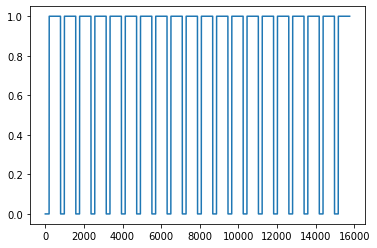

In [28]:
beh=motionSVD
motSVD=motionSVD.T
print(motSVD.shape)
print(V.shape)
parea =np.array(mt['beh'][0]['pupil'][0]['area'][0][0])
S=spks
import matplotlib.pyplot as plt
tbin = 1.0
NT = motSVD.shape[1]
nt = int(np.floor(NT/tbin))
motSVD -= motSVD.mean(axis=1)[:,np.newaxis]
parea  -= np.nanmean(parea)
parea[np.isnan(parea)] = 0
tbin = int(tbin)

beh = np.reshape(motSVD[:,:nt*tbin], (motSVD.shape[0], nt, tbin)).mean(axis=-1)
pup = np.reshape(parea[:nt*tbin], (nt, tbin)).mean(axis=-1)

# using this format bin S
Sbin = np.reshape(S[:,:nt*tbin], (S.shape[0], nt, tbin)).mean(axis=-1)
# split into train-test
# * use interleaved segments *
nsegs = 20
nlen  = nt/nsegs
ninds = np.linspace(0,nt-nlen,nsegs).astype(int)
itest = (ninds[:,np.newaxis] + np.arange(0,nlen*0.25,1,int)).flatten()
itrain = np.ones(nt, np.bool)
itrain[itest] = 0

plt.plot(itrain)
plt.show()

#### PREDICT USING PUPIL WITH LINEAR REGRESSION
V=V.T
#pup =np.array(mt['beh'][0]['pupil'][0]['area'][0][0]) 
A = np.matmul(pup[itrain], V[:,itrain].T)/(pup**2).sum()

Vpredp = np.matmul(A[:,np.newaxis], pup[itest][np.newaxis,:])

varexp_pupil = 1 - ((Vpredp - V[:,itest])**2).sum(axis=1)/(V[:,itest]**2).sum(axis=1)

#### PREDICT USING BEHAVIOR PC'S 
## regularized linear regression from behavior to neural PCs
covM = np.matmul(beh[:,itrain], beh[:,itrain].T)
lam = 1e5 # regularizer
covM += lam*np.eye(beh.shape[0])
A = np.linalg.solve(covM, np.matmul(beh[:,itrain], V[:,itrain].T))

Vpred = np.matmul(A.T, beh[:,itest])

varexp = 1 - ((Vpred - V[:,itest])**2).sum(axis=1)/(V[:,itest]**2).sum(axis=1)